# Video Game Sales Analysis Project
## Project Overview

In this project, I'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for an online store, I'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [27]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [28]:
# Load the dataset

data = pd.read_csv('/datasets/games.csv')

In [29]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [30]:
# Check for duplicate entries
data.duplicated().sum()

0

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

There are 16,715 records in the dataset. There are float and object data types. There are nulls in some columns.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [31]:
# Convert column names to lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [32]:
# Verify the changes

### 2.2 Data Type Conversion

In [33]:
# Check current data types
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [34]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.

cols = ['name', 'platform', 'genre']
data[cols] = data[cols].astype('string')

Above I changed the name, platform, and genre columns to strings so that their values are fixed and can't be mistaken or calculated on.

I'll change unprocessed user scores shown as 'tbd' to nulls for now.

In [35]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.5       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [36]:
data.replace(['tbd'], np.nan, inplace=True)

In [37]:
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.3      2
0.9      2
0.6      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

### 2.3 Handling Missing Values

In [38]:
# Examine missing values
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [39]:
# Calculate percentage of missing values
pct_missing_cols = data.isna().mean().mul(100).round(2)
print(pct_missing_cols.sort_values(ascending=False))

user_score         54.59
critic_score       51.32
rating             40.48
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64


In [40]:
# Analyze patterns in missing values
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993.0,<NA>,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,<NA>,GEN,1993.0,<NA>,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [41]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993.0,<NA>,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,<NA>,GEN,1993.0,<NA>,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [42]:
data = data.drop(index=[659, 14244])

In [43]:
print(pct_missing_cols.sort_values(ascending=False))

user_score         54.59
critic_score       51.32
rating             40.48
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64


In [44]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [45]:
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [46]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
# Calculate the median of the 'age' column
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
userscore_median = data['user_score'].median()
data['user_score'] = data['user_score'].fillna(value=userscore_median)

In [47]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
criticscore_median = data['critic_score'].median()
data['critic_score'] = data['critic_score'].fillna(value=criticscore_median)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16713 non-null  string 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  string 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(1), string(3)
memory usage: 1.5+ MB


In [49]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,71.0,7.5,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,7.5,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,71.0,7.5,NaN




The rows that had missing name and genre data were the same rows so I deleted them from the dataset. The user_score and critic_score had numeric data so I filled their null values with the median of their respective column since that is how missing quantitative data is normally handled. I left the null values of the year_of_release and the maturity rating columns since that data I could normally ask to get that information to be filled with old historical records. I also won't be making many calculations with those columns so for the sake of the project it's fine they have nulls.

### 2.4 Calculate Total Sales

In [50]:
# Calculate total sales across all regions and put them in a different column
data['total_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales']
data['total_sales']

0        74.09
1        39.47
2        32.23
3        29.82
4        30.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [51]:
# Create a DataFrame with game releases by year
releases_by_year = data.groupby('year_of_release').size().reset_index()

releases_by_year.columns = ['year', 'number_of_games']

print(releases_by_year)

      year  number_of_games
0   1980.0                9
1   1981.0               46
2   1982.0               36
3   1983.0               17
4   1984.0               14
5   1985.0               14
6   1986.0               21
7   1987.0               16
8   1988.0               15
9   1989.0               17
10  1990.0               16
11  1991.0               41
12  1992.0               43
13  1993.0               60
14  1994.0              121
15  1995.0              219
16  1996.0              263
17  1997.0              289
18  1998.0              379
19  1999.0              338
20  2000.0              350
21  2001.0              482
22  2002.0              829
23  2003.0              775
24  2004.0              762
25  2005.0              939
26  2006.0             1006
27  2007.0             1197
28  2008.0             1427
29  2009.0             1426
30  2010.0             1255
31  2011.0             1136
32  2012.0              653
33  2013.0              544
34  2014.0          

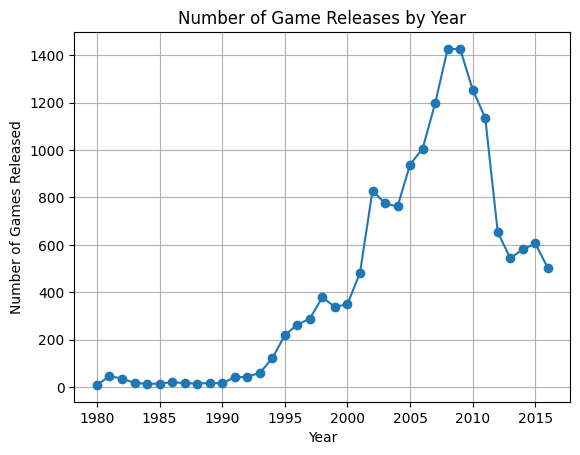

In [52]:
# Visualize the distribution of games across years

plt.plot(releases_by_year['year'], releases_by_year['number_of_games'], marker='o')
plt.title('Number of Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

The volume of games released peaked in the late 2000's

In [53]:
# Display summary statistics for each year
yearly_stats = data.groupby('year_of_release').describe()
print(yearly_stats)

                na_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980.0               9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981.0              46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982.0              36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983.0              17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984.0              14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985.0              14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986.0              21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987.0              16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988.0              15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989.0              17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

2006-2011 show the most sales.
There is a gradual increase of number of releases until a stark drop off after 2011. Despit this dropoff, there is still data from hundreds of releases per year since 2011 which is enough to make predictions.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [54]:
# Calculate total sales by platform and year


sales_pivot = data.pivot_table(
    values='total_sales', 
    index='platform', 
    columns='year_of_release', 
    aggfunc='sum', 
    fill_value=0
)
sales_pivot


year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.26,35.36,28.57,5.78,0.27,0.45,0.67,1.93,0.73,0.62,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,58.80,48.77,53.97,41.75,26.75,14.50
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,135.85,134.37,110.99,79.48,24.30,10.42,1.42,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.40,63.57,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


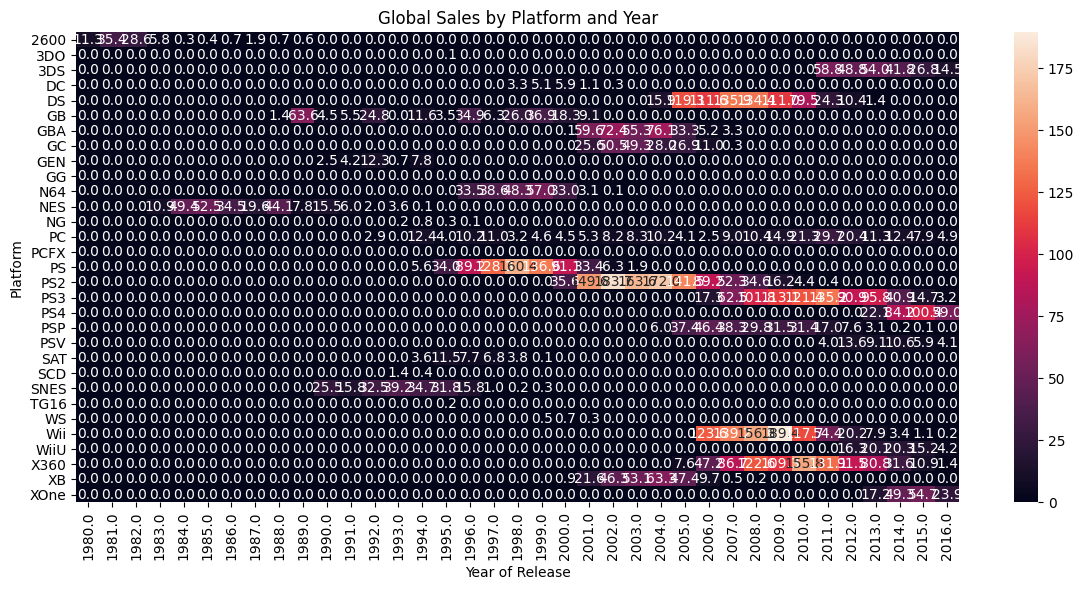

In [55]:
# Create a heatmap of platform sales over time

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".1f")
plt.title('Global Sales by Platform and Year')
plt.ylabel('Platform')
plt.xlabel('Year of Release')
plt.tight_layout()
plt.show()

Identify platforms with declining sales

Sales of all platforms have declined significantly before 2016, most recently PS3, Wii, and XBox360.

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

All the Play Station platforms, Wii, and XBox360 showed consistent sales for numbers of years. Most other platforms have dissapeared from the market. Peak sales for a game typically ranges 5-6 years.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [56]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]


# Justify your choice with data

relevant_years = [2014, 2015, 2016] # Replace with your chosen years
predict2017 = data[data['year_of_release'].isin(relevant_years)]


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

I selected the most recent years in the dataset: 2014, 2015, 2016 because they showcase the highest grossing platform most recently. It doesn't make sense to look at another year because peaks in profit come in waves of 6 or so years so the turnaround is fast and pretty variable.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

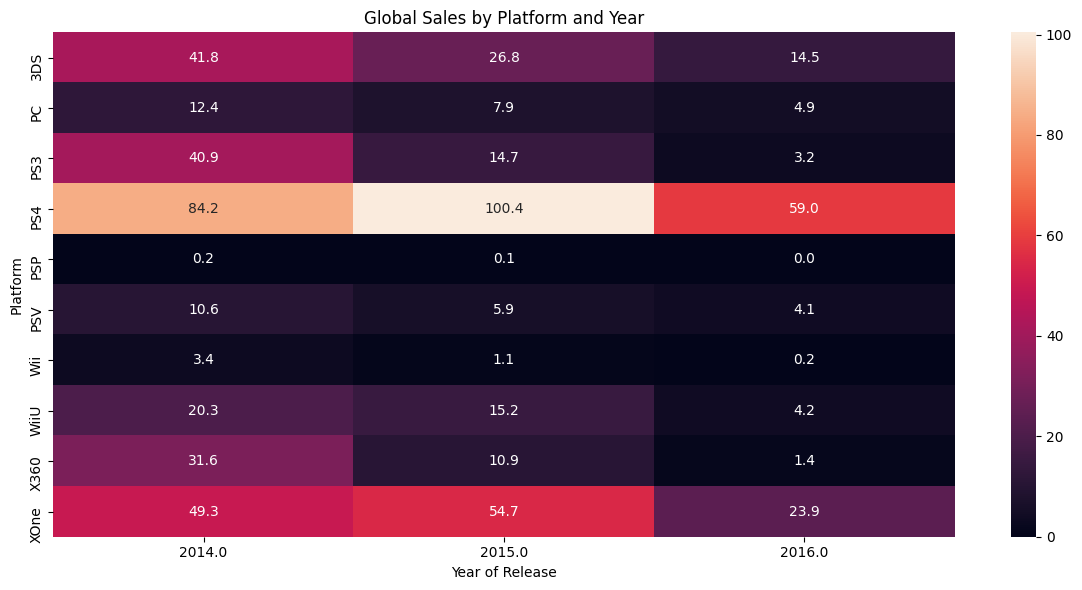

In [57]:
# Analyze platform sales trends

pivot2017 = predict2017.pivot_table(
    values='total_sales', 
    index='platform', 
    columns='year_of_release', 
    aggfunc='sum', 
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot2017, annot=True, fmt=".1f")
plt.title('Global Sales by Platform and Year')
plt.ylabel('Platform')
plt.xlabel('Year of Release')
plt.tight_layout()
plt.show()

 According to the heatmap, the PS4 has been the most successful platform as of late.

In [58]:
# Sort platforms by total sales

platform_sales = predict2017.groupby('platform')['total_sales'].sum()
platform_sales.sort_values(ascending=False)


platform
PS4     243.67
XOne    127.84
3DS      83.00
PS3      58.81
X360     43.87
WiiU     39.82
PC       25.20
PSV      20.59
Wii       4.67
PSP       0.36
Name: total_sales, dtype: float64

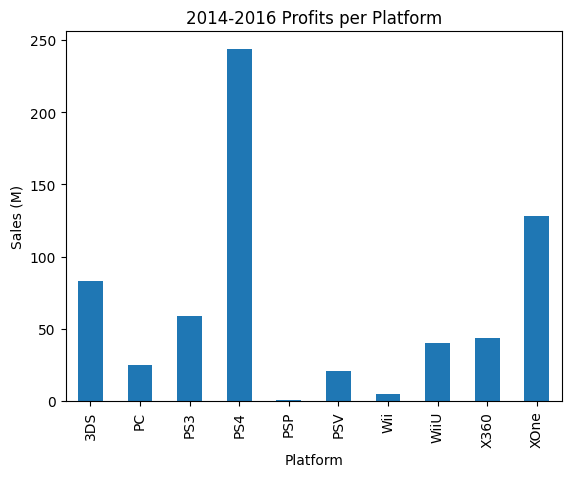

In [59]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

platform_sales.plot(kind='bar')
plt.title('2014-2016 Profits per Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (M)')
plt.show()

The PS4 and XBoxOne were the most popular platforms in recent years.

In [60]:
# Step 1: Get total sales by platform and year
platform_yearly_sales = predict2017.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Step 2: Calculate year-over-year growth
platform_yearly_sales['previous_year_sales'] = platform_yearly_sales.groupby('platform')['total_sales'].shift(1)

# Step 3: Calculate growth rate
platform_yearly_sales['yoy_growth'] = (
    (platform_yearly_sales['total_sales'] - platform_yearly_sales['previous_year_sales']) / 
    platform_yearly_sales['previous_year_sales'] * 100
)

platform_yearly_sales

,platform,year_of_release,total_sales,previous_year_sales,yoy_growth
0,3DS,2014.0,41.75,NaN,NaN
1,3DS,2015.0,26.75,41.75,-35.928144
2,3DS,2016.0,14.50,26.75,-45.794393
3,PC,2014.0,12.38,NaN,NaN
4,PC,2015.0,7.93,12.38,-35.945073
5,PC,2016.0,4.89,7.93,-38.335435
6,PS3,2014.0,40.88,NaN,NaN
7,PS3,2015.0,14.70,40.88,-64.041096
8,PS3,2016.0,3.23,14.70,-78.027211
9,PS4,2014.0,84.22,NaN,NaN


Most growth rates for platforms have been negative which means revenues are decreasing.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

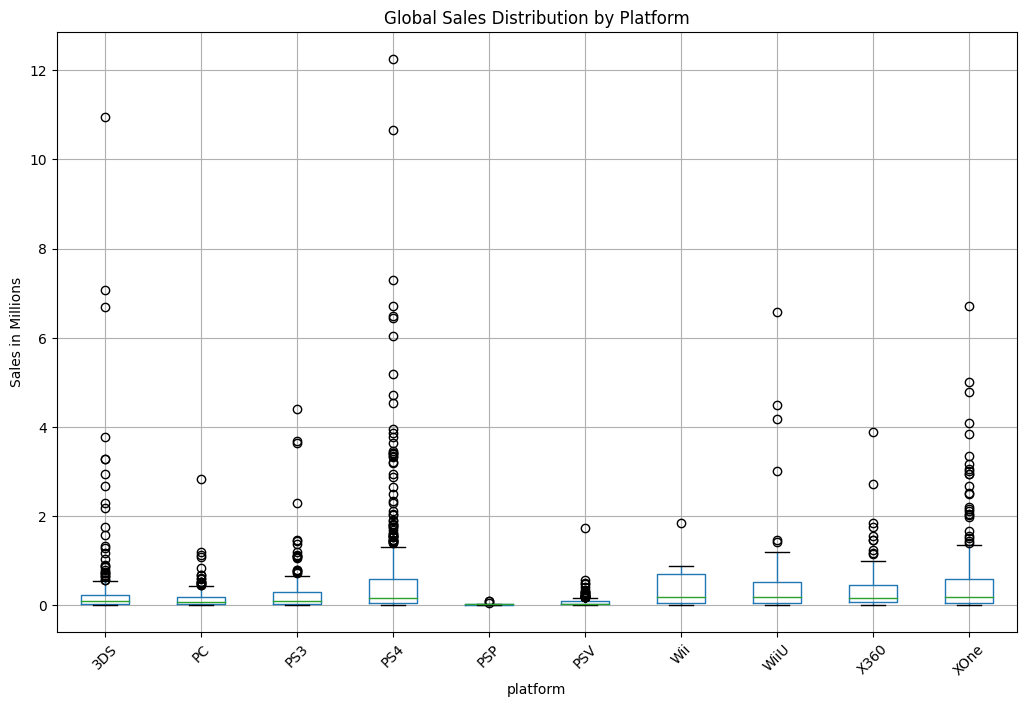

In [61]:
# Create box plot of sales by platform

predict2017.boxplot(column='total_sales', by='platform', figsize=(12, 8))
plt.title('Global Sales Distribution by Platform')
plt.ylabel('Sales in Millions')
plt.suptitle('')  # Remove automatic title
plt.xticks(rotation=45)
plt.show()

In [62]:
# Calculate detailed statistics for each platform

predict2017.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.391509,1.122935,0.01,0.030,0.080,0.230,10.94
PC,151.0,0.166887,0.304553,0.01,0.020,0.060,0.185,2.82
PS3,219.0,0.268539,0.532896,0.01,0.030,0.090,0.285,4.40
PS4,376.0,0.648059,1.358995,0.01,0.050,0.160,0.580,12.25
PSP,13.0,0.027692,0.027735,0.01,0.010,0.020,0.020,0.09
PSV,295.0,0.069797,0.123748,0.01,0.020,0.030,0.080,1.72
Wii,11.0,0.424545,0.571601,0.01,0.035,0.170,0.695,1.84
WiiU,73.0,0.545479,1.079585,0.01,0.050,0.170,0.520,6.58
X360,111.0,0.395225,0.571941,0.01,0.060,0.160,0.460,3.88


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [63]:
# Choose a popular platform based on your previous analysis

ps4 = data[data['platform'] == 'PS4']
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,NaN,12.25
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,71.0,7.5,NaN,6.70
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


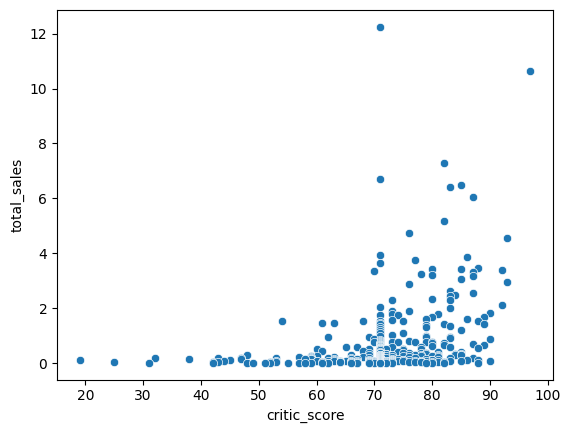

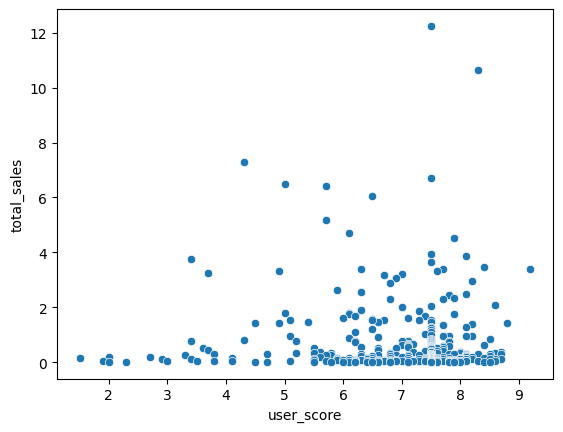

In [64]:
# Create scatter plots for both critic and user scores

sns.scatterplot(data=ps4, x='critic_score', y='total_sales')
plt.show()
sns.scatterplot(data=ps4, x='user_score', y='total_sales')
plt.show()

 Total sales serves as your dependent variable to see how reviews impact overall game success
 

In [65]:
# Calculate correlations

# Remove any rows with missing values for accurate correlation
clean_data = ps4.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Calculate correlation coefficients
critic_correlation = clean_data['critic_score'].corr(clean_data['total_sales'])
user_correlation = clean_data['user_score'].corr(clean_data['total_sales'])

print(f"Correlation between Critic Score and Sales: {critic_correlation:.3f}")
print(f"Correlation between User Score and Sales: {user_correlation:.3f}")

Correlation between Critic Score and Sales: 0.339
Correlation between User Score and Sales: -0.062


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [66]:
# Find games released on multiple platforms

# Count how many platforms each game appears on
games_per_platform = data.groupby('name').agg({
    'platform': 'count',
    'total_sales': 'sum'
}).rename(columns={'platform': 'platform_count'})

# Filter for games that appear on multiple platforms (2 or more)
multi_platform_games = games_per_platform[games_per_platform['platform_count'] >= 2]

print(f"Number of games released on multiple platforms: {len(multi_platform_games)}")
print(f"Games with most platform releases:")
print(multi_platform_games.sort_values('platform_count', ascending=False).head(10))


Number of games released on multiple platforms: 2805
Games with most platform releases:
                              platform_count  total_sales
name                                                     
Need for Speed: Most Wanted               12        12.08
Madden NFL 07                              9         9.13
LEGO Marvel Super Heroes                   9         8.30
FIFA 14                                    9        13.97
Ratatouille                                9         3.38
Terraria                                   8         1.43
Angry Birds Star Wars                      8         1.52
LEGO Jurassic World                        8         4.13
Lego Batman 3: Beyond Gotham               8         3.72
FIFA Soccer 13                             8        13.02


In [67]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
top_games = multi_platform_games.index
top_platforms = data[data['name'].isin(top_games)]['platform'].unique()
top_platforms

<StringArray>
[ 'NES',   'GB',  'PS3',  'PS2', 'SNES', 'X360',  'PS4',  'N64',   'DS',
  'Wii',   'XB',   'PC', '2600',  'PSP',  '3DS', 'XOne',   'PS',  'GBA',
 'WiiU',   'GC',  'GEN',  'PSV',   'DC',  'SAT',   'WS',   'NG']
Length: 26, dtype: string

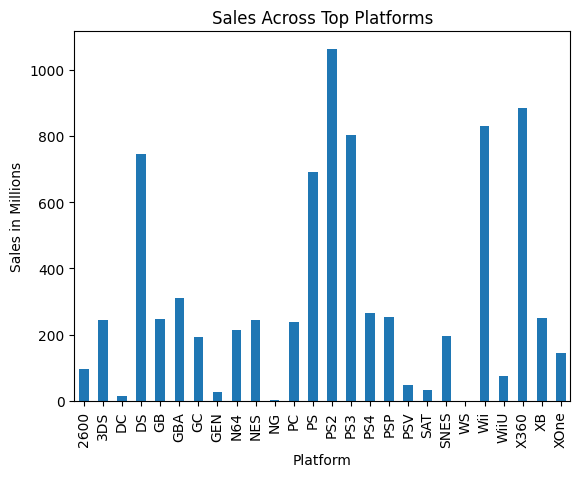

In [68]:

filtered_data = data[data['platform'].isin(top_platforms)]

# group by platform
platform_sales = filtered_data.groupby('platform')['total_sales'].sum()

platform_sales.plot(kind='bar')
plt.title('Sales Across Top Platforms')
plt.ylabel('Sales in Millions')
plt.xlabel('Platform')
plt.show()

Here is the sales distribution for platforms of the most popular games.

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [69]:
# Sort genres by total sales
genre_sales = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1559.57
Sports          1196.76
Shooter          948.34
Role-Playing     874.93
Platform         776.68
Misc             728.12
Racing           652.57
Fighting         411.17
Simulation       359.24
Puzzle           230.19
Adventure        221.10
Strategy         163.38
Name: total_sales, dtype: float64

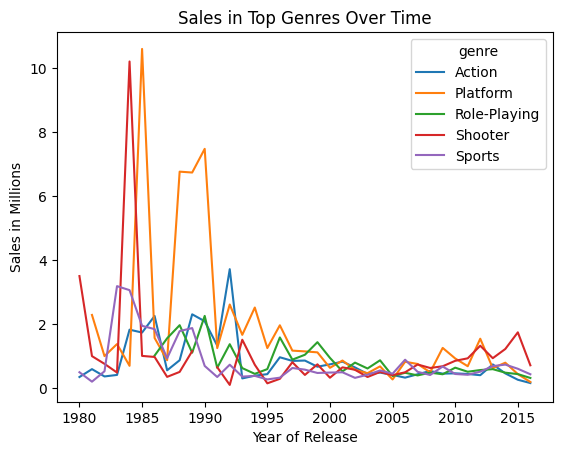

In [70]:
top_genres_list = {'Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'}
top_genres = filtered_data[filtered_data['genre'].isin(top_genres_list)]

genre_performance2 = top_genres.pivot_table(index='year_of_release', columns='genre', values='total_sales')
genre_performance2.plot(kind='line')
plt.title('Sales in Top Genres Over Time')
plt.ylabel('Sales in Millions')
plt.xlabel('Year of Release')
plt.show()

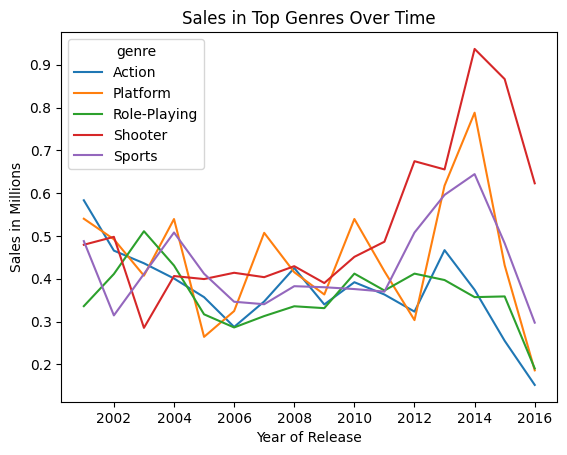

In [71]:
top_genres_list = {'Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'}
top_genres = filtered_data[filtered_data['genre'].isin(top_genres_list)]

top_genres_recent = top_genres[top_genres['year_of_release'] > 2000]
top_genres_recent = top_genres_recent[top_genres_recent['total_sales'] < 4]

genre_performance2 = top_genres_recent.pivot_table(index='year_of_release', columns='genre', values='total_sales')
genre_performance2.plot(kind='line')
plt.title('Sales in Top Genres Over Time')
plt.ylabel('Sales in Millions')
plt.xlabel('Year of Release')
plt.show()

Here is a zoomed in version of the last plot so we can more accurately observe the variation of sales amongst genres throughout the most recent years.

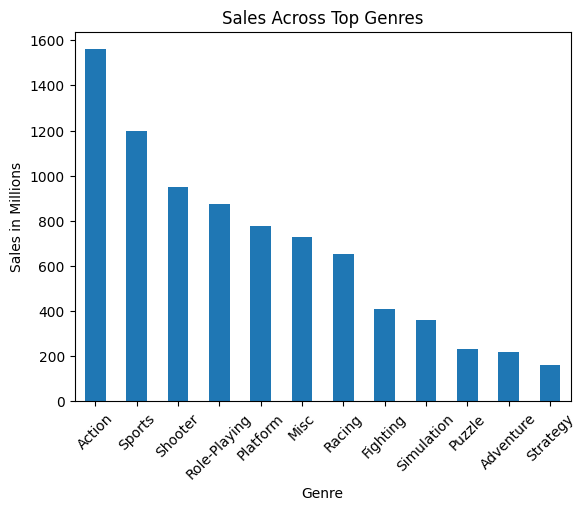

In [72]:
# Visualize genre distribution
genre_sales.plot(kind='bar')
plt.title('Sales Across Top Genres')
plt.ylabel('Sales in Millions')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Calculate market share for each genre

genre_sales = data.groupby('genre')['total_sales'].sum()

total_market_sales = data['total_sales'].sum()
market_share = (genre_sales / total_market_sales) * 100

market_share_sorted = market_share.sort_values(ascending=False)

print("Market Share by Genre (%):")
print(market_share_sorted)

Market Share by Genre (%):
genre
Action          19.201679
Sports          14.734704
Shooter         11.676116
Role-Playing    10.772280
Platform         9.562610
Misc             8.964732
Racing           8.034548
Fighting         5.062392
Simulation       4.423021
Puzzle           2.834137
Adventure        2.722219
Strategy         2.011561
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Overall Action contributes the most revenue. But in recent years, Platform and Shooter games have been the most popular. All genres are on the decline with Shooter games making the most revenue as of late. Shooter games are the most consistently profitable in recent years.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

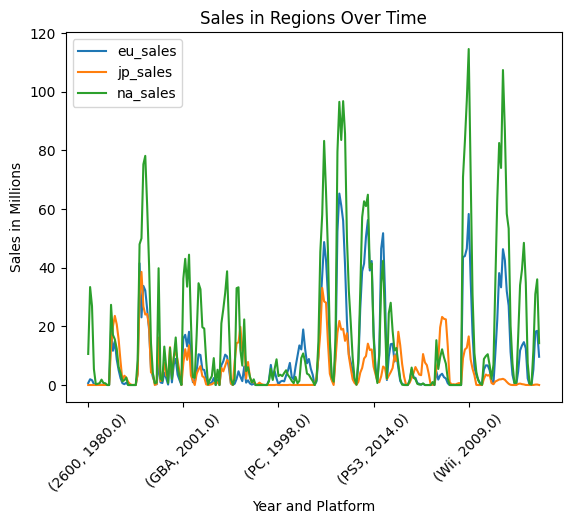

In [74]:
# Function to analyze platform performance by region

region = data.groupby(['platform', 'year_of_release'])['eu_sales', 'jp_sales', 'na_sales'].sum()
region.plot(kind='line')
plt.title('Sales in Regions Over Time')
plt.ylabel('Sales in Millions')
plt.xlabel('Year and Platform')
plt.xticks(rotation=45)
plt.show()

Below you can see each region's most profitable years and platforms.

In [75]:
# Analyze each region
eu = data.groupby(['platform', 'year_of_release'])['eu_sales'].sum()
eu.sort_values(ascending=False)

platform  year_of_release
PS2       2002.0             65.27
          2003.0             61.20
Wii       2009.0             58.31
PS3       2011.0             56.24
PS2       2004.0             56.01
                             ...  
NG        1994.0              0.00
          1993.0              0.00
NES       1994.0              0.00
PSP       2014.0              0.00
PCFX      1996.0              0.00
Name: eu_sales, Length: 238, dtype: float64

In [76]:
na = data.groupby(['platform', 'year_of_release'])['na_sales'].sum()
na.sort_values(ascending=False)

platform  year_of_release
Wii       2009.0             114.55
X360      2010.0             107.38
Wii       2008.0              97.12
PS2       2004.0              96.78
          2002.0              96.54
                              ...  
TG16      1995.0               0.00
WS        1999.0               0.00
          2000.0               0.00
          2001.0               0.00
PCFX      1996.0               0.00
Name: na_sales, Length: 238, dtype: float64

In [77]:
jp = data.groupby(['platform', 'year_of_release'])['jp_sales'].sum()
jp.sort_values(ascending=False)

platform  year_of_release
DS        2006.0             38.56
PS        1997.0             33.10
DS        2005.0             29.86
PS        1998.0             28.48
          1999.0             28.07
                             ...  
PC        2001.0              0.00
          2000.0              0.00
          1999.0              0.00
          1998.0              0.00
2600      1980.0              0.00
Name: jp_sales, Length: 238, dtype: float64

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [78]:
# Create a comparative platform analysis

region_platform = data.groupby('platform')['eu_sales', 'jp_sales', 'na_sales'].sum()
region_platform.sort_values(by=['eu_sales', 'jp_sales', 'na_sales'], ascending=False)


,eu_sales,jp_sales,na_sales
platform,,,
PS2,339.29,139.20,583.84
PS3,330.29,80.19,393.49
X360,270.76,12.43,602.47
Wii,262.21,69.33,496.90
PS,213.61,139.82,336.52
DS,188.89,175.57,382.40
PC,142.44,0.17,94.53
PS4,141.09,15.96,108.74
GBA,75.25,47.33,187.54


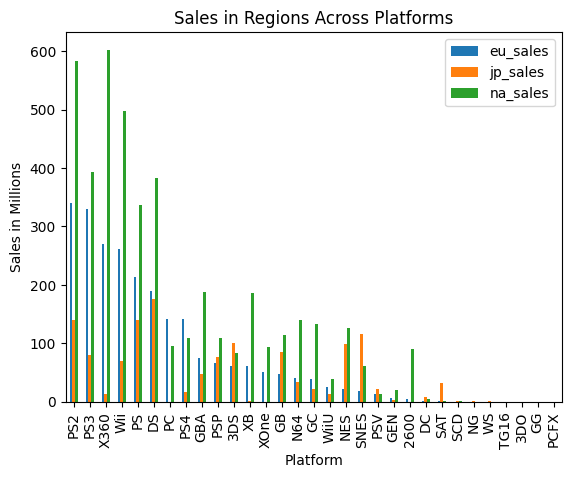

In [79]:
# Visualize cross-regional comparison for top platforms
region_platform = region_platform.sort_values(by=['eu_sales', 'jp_sales', 'na_sales'], ascending=False)
region_platform.plot(kind='bar')
plt.title('Sales in Regions Across Platforms')
plt.ylabel('Sales in Millions')
plt.xlabel('Platform')
plt.show()

This plot shows that North America's most profitable platform was X360, Europe's was the PS2, and Japan's was the DS.

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [80]:
# Function to analyze genre performance by region

region_genre = data.groupby('genre')['eu_sales', 'jp_sales', 'na_sales'].sum()
region_genre.sort_values(by=['eu_sales', 'jp_sales', 'na_sales'], ascending=False)


,eu_sales,jp_sales,na_sales
genre,,,
Action,519.13,161.43,879.01
Sports,376.79,135.54,684.43
Shooter,317.34,38.76,592.24
Racing,236.51,56.71,359.35
Misc,212.74,108.11,407.27
Platform,200.35,130.83,445.50
Role-Playing,188.71,355.41,330.81
Simulation,113.52,63.80,181.92
Fighting,100.33,87.48,223.36


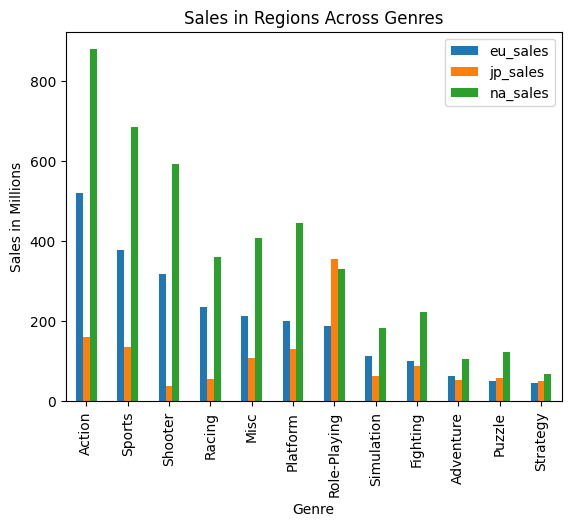

In [81]:
region_genre = region_genre.sort_values(by=['eu_sales', 'jp_sales', 'na_sales'], ascending=False)
region_genre.plot(kind='bar')
plt.title('Sales in Regions Across Genres')
plt.ylabel('Sales in Millions')
plt.xlabel('Genre')
plt.show()

This plot shows that North America's most profitable game genre is Action, Europe's is Action, and Japan's is Role-Playing.

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [83]:
# Function to analyze ESRB rating impact

data.groupby('rating')['eu_sales', 'jp_sales', 'na_sales'].sum().sort_values(by=['eu_sales', 'jp_sales', 'na_sales'], ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
E,710.25,198.11,1292.99
M,483.97,64.24,748.48
T,427.03,151.40,759.75
E10+,188.52,40.20,353.32
AO,0.61,0.00,1.26
K-A,0.27,1.46,2.56
EC,0.11,0.00,1.53
RP,0.08,0.00,0.00


Below are the sales distributions for each region across maturity ratings.

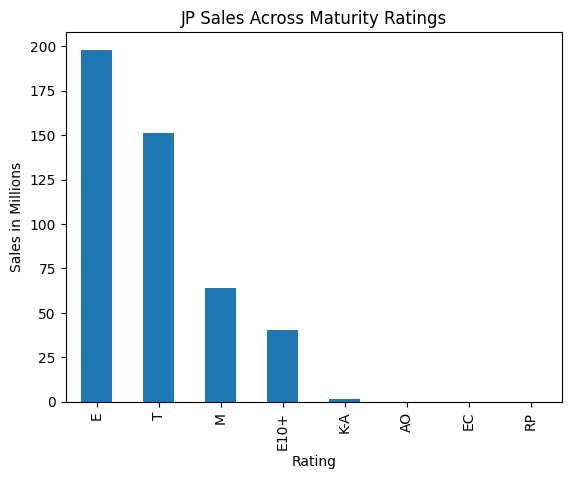

In [84]:
# Analyze ESRB impact for each region


jp_rating = data.groupby('rating')['jp_sales'].sum()
jp_rating = jp_rating.sort_values(ascending=False)
jp_rating.plot(kind='bar')
plt.title('JP Sales Across Maturity Ratings')
plt.ylabel('Sales in Millions')
plt.xlabel('Rating')
plt.show()


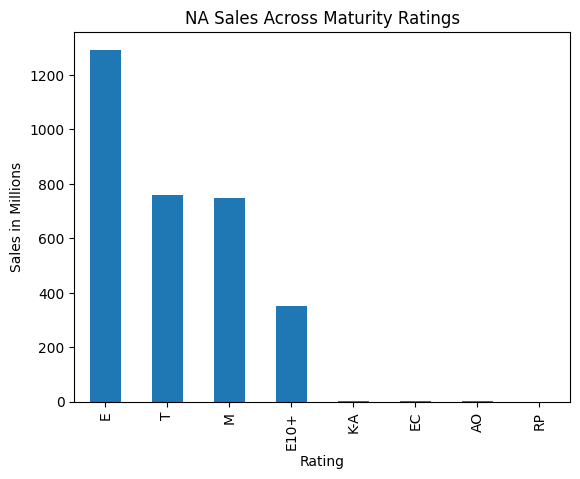

In [85]:
na_rating = data.groupby('rating')['na_sales'].sum()
na_rating = na_rating.sort_values(ascending=False)
na_rating.plot(kind='bar')
plt.title('NA Sales Across Maturity Ratings')
plt.ylabel('Sales in Millions')
plt.xlabel('Rating')
plt.show()

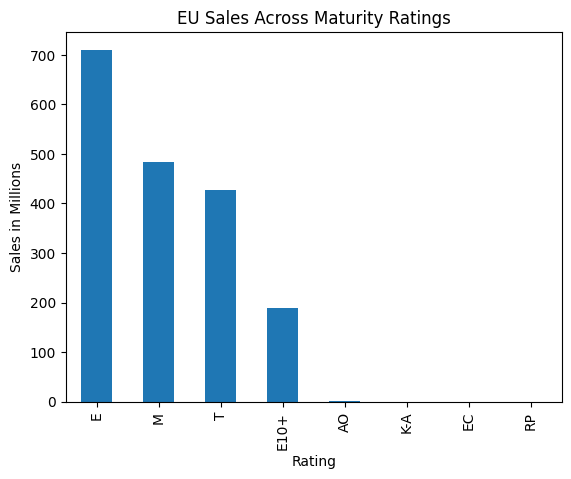

In [86]:
eu_rating = data.groupby('rating')['eu_sales'].sum()
eu_rating = eu_rating.sort_values(ascending=False)
eu_rating.plot(kind='bar')
plt.title('EU Sales Across Maturity Ratings')
plt.ylabel('Sales in Millions')
plt.xlabel('Rating')
plt.show()

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [87]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: Int64

Null Hypothesis: The average user ratings of Xbox One and PC platforms are equal

Alternative Hypothesis: The average user ratings of Xbox One and PC platforms are not equal  

In [92]:
from scipy import stats as st

# Convert user_score to numeric first (do this on the original data)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Then filter the platforms
xbox = data[data['platform'] == 'XOne']
pc = data[data['platform'] == 'PC']

# Get the actual user score arrays (removing NaN values)
xbox_scores = xbox['user_score'].dropna()
pc_scores = pc['user_score'].dropna()

alpha = .05

results = st.ttest_ind(xbox_scores, pc_scores)
# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)
      # your code: print the p-value you get)

if results.pvalue < alpha:
    # your code: compare the p-values you get with the statistical significance level
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



p-value: 0.00010123955107193582
We reject the null hypothesis


Null Hypothesis: The average user ratings of Action and Sports genre games are different.

Alternative Hypothesis: The average user ratings of Action and Sports genre games are equal.

In [96]:

# filter the genres
action = data[data['genre'] == 'Action']
sports = data[data['genre'] == 'Sports']

# Get the actual user score arrays (removing NaN values)
action_scores = action['user_score'].dropna()
sports_scores = sports['user_score'].dropna()

alpha = .05

results = st.ttest_ind(action_scores, sports_scores)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.7131417795320426
We can't reject the null hypothesis


# Step 6. Write a general conclusion


Sales across the board peaked between 2006 and 2011. North America drives the most sales. The most profitable genres and platforms differ between regions. Action and Sports games drive the most revenue. PlayStation4 and XOne are the most profitable platforms as of late. Profits across the board are down in recent years. This could be a general shift in attitude towards gaming in general.